<a href="https://colab.research.google.com/github/fatmatosunytu/5/blob/main/K_ortalama_k%C3%BCmeleme_algoritmas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Karışıklık Matrisi:
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



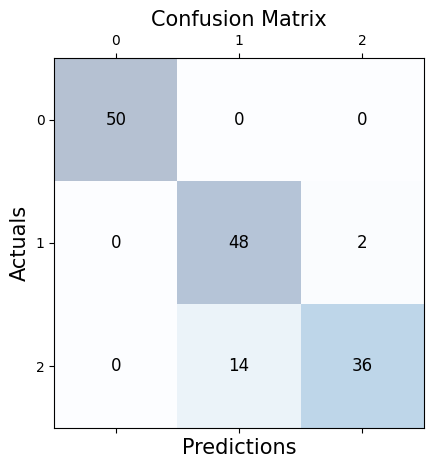

In [1]:
# Gerekli kütüphaneleri içe aktar
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Iris veri setini yükle
iris = datasets.load_iris()
X = iris.data  # Özellikler (Bağımsız Değişkenler)
y = iris.target  # Etiketler (Bağımlı Değişkenler)

# Veriyi karıştır (shuffle) - Kümeleme için sıralı veriyi karıştırmak faydalı olabilir
X, y = shuffle(X, y, random_state=42)

# K-Means modelini oluştur ve eğit
model = KMeans(n_clusters=3, random_state=42)  # 3 küme belirle
iris_kmeans = model.fit(X)  # Modeli veriye uydur

# Model ile tahmin yap
y_pred = iris_kmeans.predict(X)

# Karışıklık matrisi ve sınıflandırma raporunu hesapla
c = confusion_matrix(y, y_pred)
cr = classification_report(y, y_pred)

# Sonuçları ekrana yazdır
print("Karışıklık Matrisi:\n", c)
print("Sınıflandırma Raporu:\n", cr)

# Karışıklık matrisini görselleştir
fig, ax = plt.subplots()
ax.matshow(c, cmap=plt.cm.Blues, alpha=0.3)  # Matrisin görselleştirilmesi

# Matris üzerine değerleri ekleyelim
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        ax.text(x=j, y=i, s=c[i, j], va='center', ha='center', size='large')

# Grafiği etiketle ve göster
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=15)
plt.show()


In [3]:
names = ['sepal length', 'sepal width', 'petal length', 'petal width']


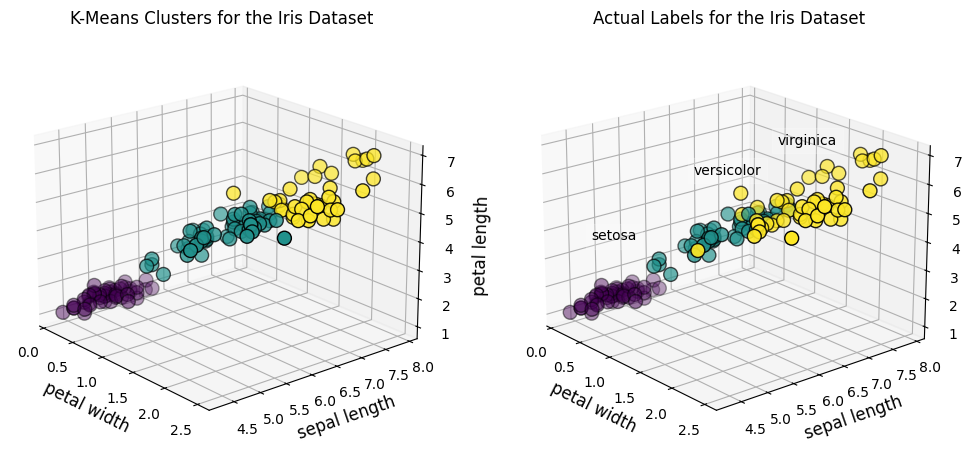

In [4]:
# Grafik çizimi için figür oluştur
fig = plt.figure(figsize=(12, 8))

# Kümeleme sonucu tahmin edilen kümeleri 3D olarak gösteren subplot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 3], X[:, 0], X[:, 2], c=iris_kmeans.labels_.astype(float), edgecolor="k", s=100)
ax1.view_init(20, -40)  # Kamera açısı
ax1.set_xlabel(names[3], fontsize=12)
ax1.set_ylabel(names[0], fontsize=12)
ax1.set_zlabel(names[2], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=12)

# Gerçek etiketleri 3D olarak gösteren subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Setosa, Versicolor ve Virginica türlerinin ortalama konumlarını belirleyerek etiket ekleme
for label, name in enumerate(['setosa', 'versicolor', 'virginica']):
    ax2.text3D(
        X[y == label, 3].mean(),  # X ekseni ortalaması
        X[y == label, 0].mean(),  # Y ekseni ortalaması
        X[y == label, 2].mean() + 2,  # Z ekseni ortalaması
        name,  # Etiket adı
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

# Gerçek etiketlere göre veri noktalarını çizdir
ax2.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k", s=100)
ax2.view_init(20, -40)  # Kamera açısı
ax2.set_xlabel(names[3], fontsize=12)
ax2.set_ylabel(names[0], fontsize=12)
ax2.set_zlabel(names[2], fontsize=12)
ax2.set_title("Actual Labels for the Iris Dataset", fontsize=12)

# Grafiği göster
fig.show()


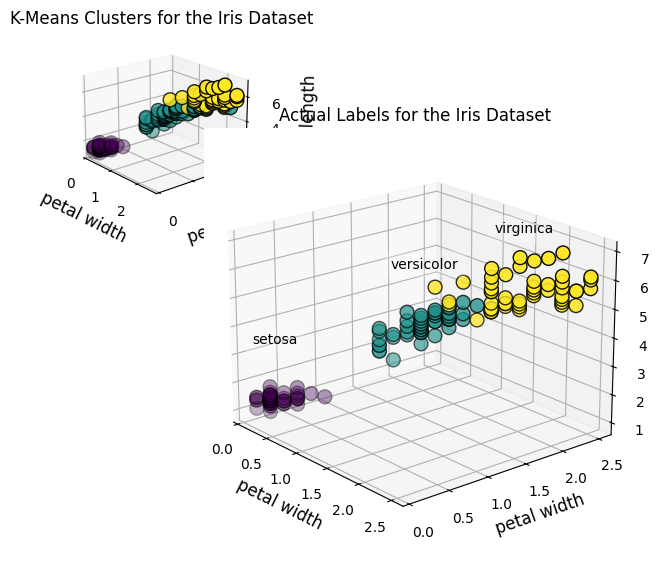

In [8]:
# Grafik çizimi için figür oluştur
fig = plt.figure(figsize=(12, 8))

# Kümeleme sonucu tahmin edilen kümeleri 3D olarak gösteren subplot
ax1 = fig.add_subplot(3, 3, 2, projection='3d')
ax1.scatter(X[:, 3], X[:, 3], X[:, 2], c=iris_kmeans.labels_.astype(float), edgecolor="k", s=100)
ax1.view_init(20, -40)  # Kamera açısı
ax1.set_xlabel(names[3], fontsize=12)
ax1.set_ylabel(names[3], fontsize=12)
ax1.set_zlabel(names[2], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=12)

# Gerçek etiketleri 3D olarak gösteren subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Setosa, Versicolor ve Virginica türlerinin ortalama konumlarını belirleyerek etiket ekleme
for label, name in enumerate(['setosa', 'versicolor', 'virginica']):
    ax2.text3D(
        X[y == label, 3].mean(),  # X ekseni ortalaması
        X[y == label, 3].mean(),  # Y ekseni ortalaması
        X[y == label, 2].mean() + 2,  # Z ekseni ortalaması
        name,  # Etiket adı
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

# Gerçek etiketlere göre veri noktalarını çizdir
ax2.scatter(X[:, 3], X[:, 3], X[:, 2], c=y, edgecolor="k", s=100)
ax2.view_init(20, -40)  # Kamera açısı
ax2.set_xlabel(names[3], fontsize=12)
ax2.set_ylabel(names[3], fontsize=12)
ax2.set_zlabel(names[2], fontsize=12)
ax2.set_title("Actual Labels for the Iris Dataset", fontsize=12)

# Grafiği göster
fig.show()

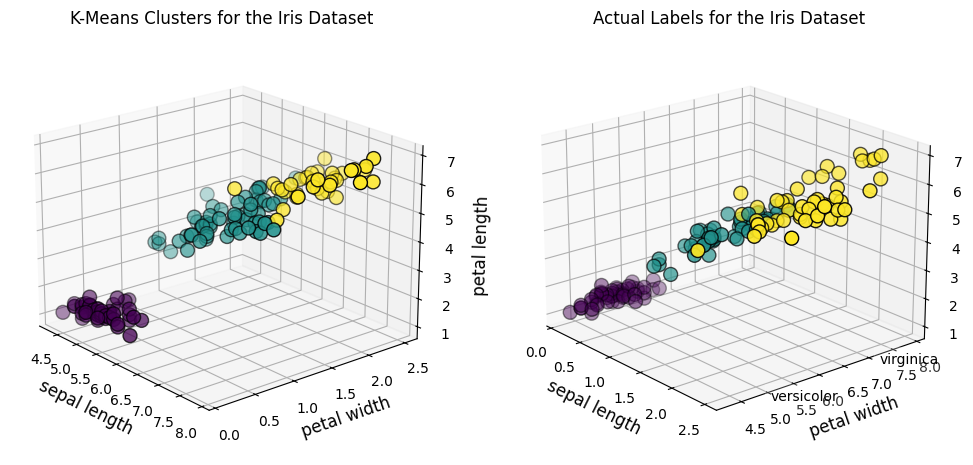

In [9]:
# Grafik çizimi için figür oluştur
fig = plt.figure(figsize=(12, 8))

# Kümeleme sonucu tahmin edilen kümeleri 3D olarak gösteren subplot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 3], X[:, 2], c=iris_kmeans.labels_.astype(float), edgecolor="k", s=100)
ax1.view_init(20, -40)  # Kamera açısı
ax1.set_xlabel(names[0], fontsize=12)
ax1.set_ylabel(names[3], fontsize=12)
ax1.set_zlabel(names[2], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=12)

# Gerçek etiketleri 3D olarak gösteren subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Setosa, Versicolor ve Virginica türlerinin ortalama konumlarını belirleyerek etiket ekleme
for label, name in enumerate(['setosa', 'versicolor', 'virginica']):
    ax2.text3D(
        X[y == label, 0].mean(),  # X ekseni ortalaması
        X[y == label, 3].mean(),  # Y ekseni ortalaması
        X[y == label, 2].mean() + 2,  # Z ekseni ortalaması
        name,  # Etiket adı
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

# Gerçek etiketlere göre veri noktalarını çizdir
ax2.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k", s=100)
ax2.view_init(20, -40)  # Kamera açısı
ax2.set_xlabel(names[0], fontsize=12)
ax2.set_ylabel(names[3], fontsize=12)
ax2.set_zlabel(names[2], fontsize=12)
ax2.set_title("Actual Labels for the Iris Dataset", fontsize=12)

# Grafiği göster
fig.show()

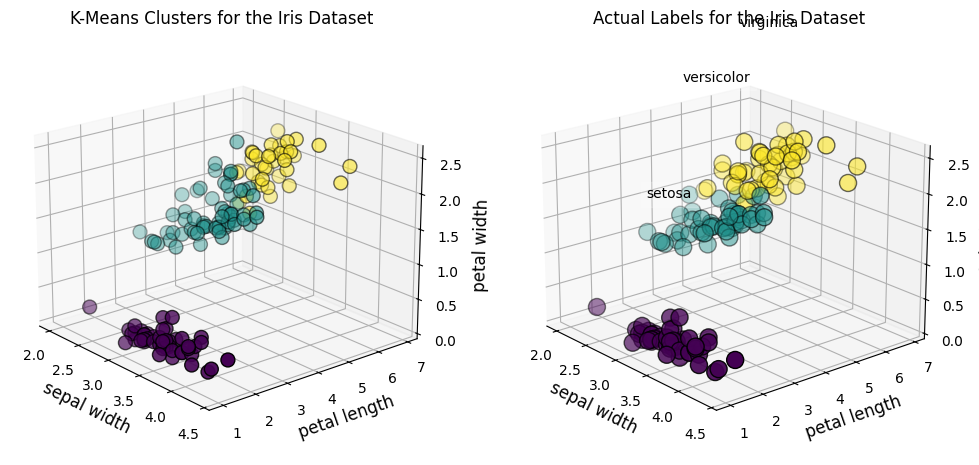

In [11]:
# Grafik çizimi için figür oluştur
fig = plt.figure(figsize=(12, 8))

# Kümeleme sonucu tahmin edilen kümeleri 3D olarak gösteren subplot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 1], X[:, 2], X[:, 3], c=iris_kmeans.labels_.astype(float), edgecolor="k", s=100)
ax1.view_init(20, -40)  # Kamera açısı
ax1.set_xlabel(names[1], fontsize=12)
ax1.set_ylabel(names[2], fontsize=12)
ax1.set_zlabel(names[3], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=12)

# Gerçek etiketleri 3D olarak gösteren subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Setosa, Versicolor ve Virginica türlerinin ortalama konumlarını belirleyerek etiket ekleme
for label, name in enumerate(['setosa', 'versicolor', 'virginica']):
    ax2.text3D(
        X[y == label, 1].mean(),  # X ekseni ortalaması
        X[y == label, 2].mean(),  # Y ekseni ortalaması
        X[y == label, 3].mean() + 2,  # Z ekseni ortalaması
        name,  # Etiket adı
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

# Gerçek etiketlere göre veri noktalarını çizdir
ax2.scatter(X[:, 1], X[:, 2], X[:, 3], c=y, edgecolor="k", s=150)
ax2.view_init(20, -40)  # Kamera açısı
ax2.set_xlabel(names[1], fontsize=12)
ax2.set_ylabel(names[2], fontsize=12)
ax2.set_zlabel(names[3], fontsize=12)
ax2.set_title("Actual Labels for the Iris Dataset", fontsize=12)

# Grafiği göster
fig.show()

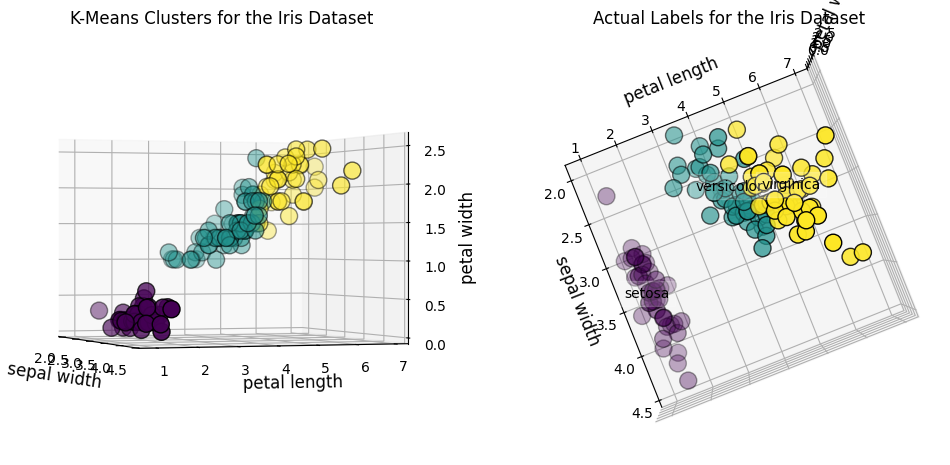

In [12]:
iris_kmeans.cluster_centers_
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 1], X[:, 2], X[:, 3], c=iris_kmeans.labels_.astype(float), edgecolor="k", s=150)
ax1.view_init(0, -20)
ax1.set_xlabel(names[1], fontsize=12)
ax1.set_ylabel(names[2], fontsize=12)
ax1.set_zlabel(names[3], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=12)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for label, name in enumerate(['setosa', 'versicolor', 'virginica']):
    ax2.text3D(
        X[y == label, 1].mean(),
        X[y == label, 2].mean(),
        X[y == label, 3].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax2.scatter(X[:, 1], X[:, 2], X[:, 3], c=y, edgecolor="k", s=150)
ax2.view_init(90, -20)
ax2.set_xlabel(names[1], fontsize=12)
ax2.set_ylabel(names[2], fontsize=12)
ax2.set_zlabel(names[3], fontsize=12)
ax2.set_title("Actual Labels for the Iris Dataset", fontsize=12)

fig.show()
